In [1]:
%matplotlib inline
import numpy as np
from numpy import random
import random
import math
import matplotlib.pyplot as plt
from operator import add
import itertools
from utilities1 import *
from build_simulation import *
from build_network import *
import nest



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Oct 15 2023 15:12:16

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [5]:
def I_vs_PSD(a_values, SD_values, log):
    sim_time=100000
    f=10
    plt.rcParams["font.family"] = "Liberation Serif"
    colors = ["#006D5B", "cornflowerblue"]
    for i, sd in enumerate(SD_values):
        amp_list = []
        for j, a in enumerate(a_values):
            results = build_simulation(sim_time=sim_time, noisy=True,
                              f1=f, a=a, SD=sd, resolution=0.25)
            
            spike_times = results["spike_times"]
            freqs, psd_values = psd(spike_times, sim_time, bin_size=1)
            psd_index = np.argmin(np.abs(freqs-f)) 
            if len(spike_times) > 0:
                psd_amp = np.abs(psd_values[psd_index]) 
            else:
                psd_amp = 0
            amp_list.append(psd_amp)
            
    
        plt.plot(a_values, amp_list, color=colors[i], label=rf"$\sigma_{{\mathrm{{I}}}} = {sd}\,\mathrm{{pA}}$")  
    ax = plt.gca()
    
    ax.set_xlabel(r"$I_{\mathrm{amp}}$ [pA]", color="#006D5B", fontsize=16)
    ax.set_title(rf"Power at $f=10$Hz (spike train) vs. $I_{{\mathrm{{amp}}}}$", fontsize=20, color="#006D5B", fontweight='bold')
    if log:
        ax.set_xscale("log")
        ax.set_yscale("log")
    
    ax.set_ylabel(r'Power [$\mathrm{spikes}^2/\mathrm{Hz}$]', color="#006D5B", fontsize=16)
    ax.set_facecolor("#F5F5F5")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("#333333")
    ax.spines["bottom"].set_color("#333333")
    ax.xaxis.label.set_color("#006D5B")
    ax.yaxis.label.set_color("#006D5B")
    ax.tick_params(axis='both', colors="#333333", labelsize='large')
    ax.grid()
    ax.legend(facecolor="white", framealpha=1, edgecolor="#333333", fontsize=16)
        
    
    save_figure("PSD_vs_I")
    plt.tight_layout()
    plt.show()
        


May 14 10:40:45 correlospinmatrix_detector [Info]: 
    Default for delta_tau changed from 0.1 to 0.25 ms

May 14 10:40:45 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.25 ms.
Saved plot as: /mnt/user/shared/Tonjes_CompNeuro/comp_neuro_course/master/notebooks/results/PSD_vs_I.png


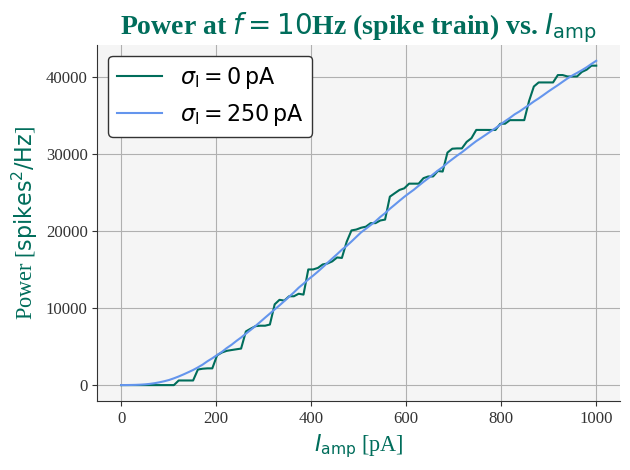

In [6]:
I_vs_FFT(a_values=np.linspace(0,1000,100), SD_values=[0,250], log=False)